## Using Focus Measures to Filter Out Blurry Images

### Introduction
Brenner's focus measure is a sharpness or focus measure used in image processing to assess the clarity or focus of an image. It is particularly useful for quantifying the sharpness of an image, making it valuable in autofocus algorithms, image quality assessment, and computer vision tasks.

In this demo, we'll implement multiple variations of Brenner's focus measure and then analyze which method is most useful for our dataset.

### Set Up
For this demo, the set up is relatively simple. First we'll get a few pip packages installed and then get our dataset from my roboflow account which is just a copy/subset of the [GoPro dataset](https://paperswithcode.com/dataset/gopro) that I've uploaded to roboflow. The full dataset can be found [here](https://seungjunnah.github.io/Datasets/gopro.html). If you're not familiar with roboflow, the platform makes working with datasets of all types incredibly easy. 

In [ ]:
# Install pip packages
!pip install roboflow --quiet

In [ ]:
# Imports
import numpy as np
from PIL import Image
import roboflow
from IPython.display import display, Image
import os
import matplotlib.pyplot as plt

In [ ]:
# Set constant working directory and create dataset directory
HOME = os.getcwd()
print(HOME)
!mkdir {HOME}/datasets
%cd {HOME}/datasets

In [ ]:
# Autheticate with roboflow (you must already have a free account)
roboflow.login()
rf = roboflow.Roboflow()

# Connect to my workspace and the roboflow Project data hosts the Gopro dataset
project = rf.workspace("bowenkruse").project("gopro_large_subset")
dataset = project.version(1).download("clip")

#### Variation 1: Horizontal Derivative (The Original)
The first variation we'll implement is the original, which sums the squares of the horizontal first derivative, which is a complicated way to say it measures the difference in brightness between neighboring pixels in the horizontal direction. 

In [10]:
def get_brenners_focus_horizontal_derivative(pil_image: Image.Image) -> float:
    """
    Calculate Brenner's focus measure to assess the sharpness of a given image.
    Variation 1 of Brenner's focus measure

    Args:
        pil_image (Image.Image): A PIL Image object to be analyzed.

    Returns:
        float: Brenner's focus measure for the image.
    """
    
    # Ensure the input image is in grayscale mode ('L' mode)
    if pil_image.mode != 'L':
        pil_image = pil_image.convert('L')

    # Convert the PIL image to a NumPy array for efficient processing
    image = np.array(pil_image)

    # Compute the difference between adjacent pixels along the vertical axis (axis=0)
    diff = np.diff(image, axis=1)

    # Calculate Brenner's focus measure by summing the squares of the differences
    focus_measure = np.sum(diff**2)

    return focus_measure

#### Variation 2: Vertical Derivative
The second variation is very similar to the original, however instead of measuring the difference between pixels in the horizontal direction, the derivative is taken in the vertical direction. 

In [11]:
def get_brenners_focus_vert_derivative(pil_image: Image.Image) -> float:
    """
    Calculate Brenner's focus measure to assess the sharpness of a given image.
    Variation 2 of Brenner's focus measure
    Args:
        pil_image (Image.Image): A PIL Image object to be analyzed.

    Returns:
        float: Brenner's focus measure for the image.
    """
    
    # Ensure the input image is in grayscale mode ('L' mode)
    if pil_image.mode != 'L':
        pil_image = pil_image.convert('L')

    # Convert the PIL image to a NumPy array for efficient processing
    image = np.array(pil_image)

    # Compute the difference between adjacent pixels along the vertical axis (axis=0)
    diff = np.diff(image, axis=0)

    # Calculate Brenner's focus measure by summing the squares of the differences
    focus_measure = np.sum(diff**2)

    return focus_measure


#### Variation 3: Horizontal Gradient
For the third variation, instead of simply taking difference between adjacent pixels, this variation uses the gradient (rate of change) along the horizontal direction, rather than just the pixel-to-pixel differences as in the original Brenner's measure. This method is more sophisticated and robust than the original Brenner focus measure because it can better handle subtle changes in intensity and is less sensitive to noise.

In [12]:
def get_brenners_focus_horizontal_gradient(pil_image: Image.Image) -> float:
    """
    Calculate Brenner's focus measure to assess the sharpness of a given image.
    Variation 3 of Brenner's focus measure

    Args:
        pil_image (Image.Image): A PIL Image object to be analyzed.

    Returns:
        float: Brenner's focus measure for the image.
    """
    
    # Ensure the input image is in grayscale mode ('L' mode)
    if pil_image.mode != 'L':
        pil_image = pil_image.convert('L')

    # Convert the PIL image to a NumPy array for efficient processing
    image = np.array(pil_image)

    # Gradient in the horizontal direction
    grad_x = np.gradient(image, axis=1)  

    # Sum of squares of horizontal gradient
    focus_measure = np.sum(grad_x**2)

    return focus_measure

#### Variation 4: Vertical Gradient
The forth variant we'll implement is similar to the third variation, however it will instead use the vertical gradient.

In [13]:
def get_brenners_focus_vert_gradient(pil_image: Image.Image) -> float:
    """
    Calculate Brenner's focus measure to assess the sharpness of a given image.
    Variation 4 of Brenner's focus measure

    Args:
        pil_image (Image.Image): A PIL Image object to be analyzed.

    Returns:
        float: Brenner's focus measure for the image.
    """
    
    # Ensure the input image is in grayscale mode ('L' mode)
    if pil_image.mode != 'L':
        pil_image = pil_image.convert('L')

    # Convert the PIL image to a NumPy array for efficient processing
    image = np.array(pil_image)

    # Gradient in the vertical direction
    grad_x = np.gradient(image, axis=0)  

    # Sum of squares of vertical gradient
    focus_measure = np.sum(grad_x**2)

    return focus_measure

#### Variation 5: Horizontal Derivative (With Color)
The fifth and final variant we'll look at is a color variant. If you look in the four implementations above, the first step of each function is to convert the given image to grayscale mode. This is a variation on the first original equation that computes the horizontal derivative for each color channel (Red, Green, and Blue), and then it averages the focus measures across the three channels. Note that some great next steps would be to call one of the other 3 varations we've tested here today instead of the original horizontal derivative variation and evaluate the results. 

In [17]:


def get_brenners_focus_color(pil_image: Image.Image) -> float:
    """
    Calculate Brenner's focus measure for a color image by applying the horizontal derivative
    Brenner's focus measure to each color channel (R, G, B) and then averaging the focus measure values.

    Args:
        pil_image (Image.Image): A PIL Image object to be analyzed.

    Returns:
        float: Brenner's focus measure for the color image.
    """
    
    # Convert the PIL image to a NumPy array
    image = np.array(pil_image)
    
    # Split the image into its R, G, B channels
    if image.ndim == 3:  # Check if it's a color image
        red_channel = image[:, :, 0]
        green_channel = image[:, :, 1]
        blue_channel = image[:, :, 2]
    else:
        raise ValueError("Input image must be a color image with 3 channels.")
    
    # Convert the NumPy arrays for each channel back to PIL images
    red_pil = Image.fromarray(red_channel)
    green_pil = Image.fromarray(green_channel)
    blue_pil = Image.fromarray(blue_channel)

    # Apply the Brenner's focus measure to each channel using get_brenners_focus_horizontal_derivative
    red_focus = get_brenners_focus_horizontal_derivative(red_pil)
    green_focus = get_brenners_focus_horizontal_derivative(green_pil)
    blue_focus = get_brenners_focus_horizontal_derivative(blue_pil)

    # Aggregate the focus measures by averaging them across the channels
    focus_measure = (red_focus + green_focus + blue_focus) / 3

    return focus_measure


Now we're going to evaluate which of the 5 implementations works the best for distinguishing between blurry and clear images. This is based on the assumption that the larger the absolute difference between the clear set's mean focus measure and the blurry set's mean focus measure the better. 

In [18]:

def load_images_from_folder(folder):
    """Load all images from a folder and return them as PIL Image objects."""
    images = []
    for filename in os.listdir(folder)[:300]:
        img_path = os.path.join(folder, filename)
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(img_path)
            images.append(img)
    return images

def evaluate_focus_measure(focus_func, images):
    """Evaluate the given focus measure function on a list of images."""
    focus_values = []
    for img in images:
        focus_value = focus_func(img)
        focus_values.append(focus_value)
    return focus_values  # Return the list of focus values for each image

def plot_focus_measure(focus_func_name, blurry_values, clear_values):
    """Plot focus measure values for blurry and clear images."""
    plt.figure(figsize=(10, 6))

    # Plot the focus values for blurry images in red
    plt.plot(blurry_values, 'r-', label='Blurry Images')

    # Plot the focus values for clear images in blue
    plt.plot(clear_values, 'b-', label='Clear Images')

    # Add labels and title
    plt.title(f'Focus Measure: {focus_func_name}')
    plt.xlabel('Image Index')
    plt.ylabel('Focus Measure Value')
    plt.legend()

    # Show the plot
    plt.show()

def compare_focus_measures(blur_images_folder, clear_images_folder, focus_functions):
    """Compare multiple focus measure functions for distinguishing between blurry and clear images."""
    
    # Load blurry and clear images
    blurry_images = load_images_from_folder(blur_images_folder)
    clear_images = load_images_from_folder(clear_images_folder)

    results = []

    for focus_func in focus_functions:
        # Evaluate focus measure on blurry and clear images
        blurry_values = evaluate_focus_measure(focus_func, blurry_images)
        clear_values = evaluate_focus_measure(focus_func, clear_images)
        
        # Compute the mean and separation between blurry and clear
        blurry_mean = np.mean(blurry_values)
        clear_mean = np.mean(clear_values)
        separation = abs(clear_mean - blurry_mean)

        print(f"Focus Measure: {focus_func.__name__}")
        print(f"   Blurry Images - Mean: {blurry_mean}")
        print(f"   Clear Images - Mean: {clear_mean}")
        print(f"   Separation: {separation}\n")

        results.append((focus_func.__name__, blurry_mean, clear_mean, separation))

        # Plot the focus measure values for this function
        plot_focus_measure(focus_func.__name__, blurry_values, clear_values)

    # Sort the results based on separation (the larger the separation, the better the focus measure)
    results = sorted(results, key=lambda x: x[3], reverse=True)
    
    # Output the best performing focus measure function
    print(f"Best focus measure function is {results[0][0]} with separation {results[0][3]}")



Focus Measure: get_brenners_focus_horizontal_derivative
   Blurry Images - Mean: 10532908.25
   Clear Images - Mean: 18553935.046666667
   Separation: 8021026.796666667



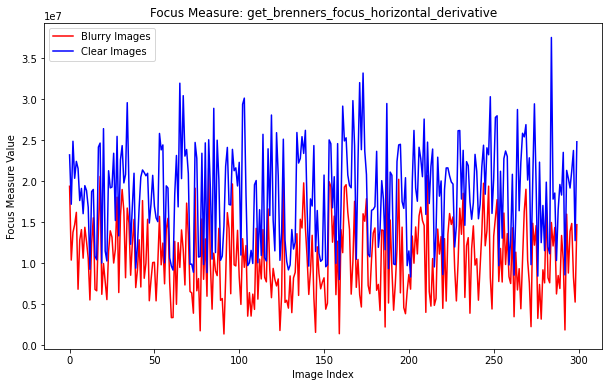

Focus Measure: get_brenners_focus_vert_derivative
   Blurry Images - Mean: 12077206.03
   Clear Images - Mean: 20029785.356666666
   Separation: 7952579.326666666



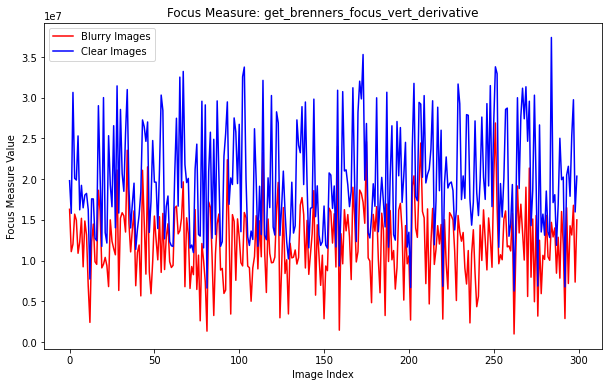

Focus Measure: get_brenners_focus_horizontal_gradient
   Blurry Images - Mean: 16788168.4025
   Clear Images - Mean: 54070488.63333333
   Separation: 37282320.23083334



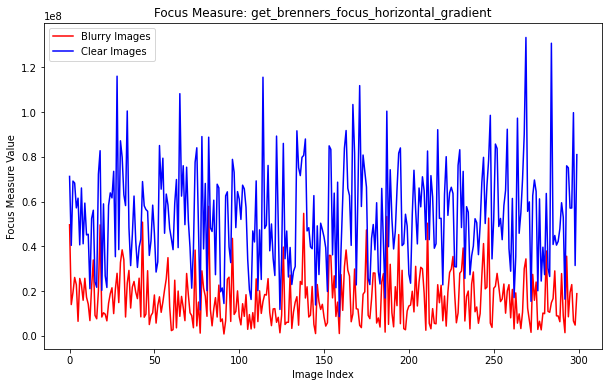

Focus Measure: get_brenners_focus_vert_gradient
   Blurry Images - Mean: 21482787.395833332
   Clear Images - Mean: 55197934.09
   Separation: 33715146.694166675



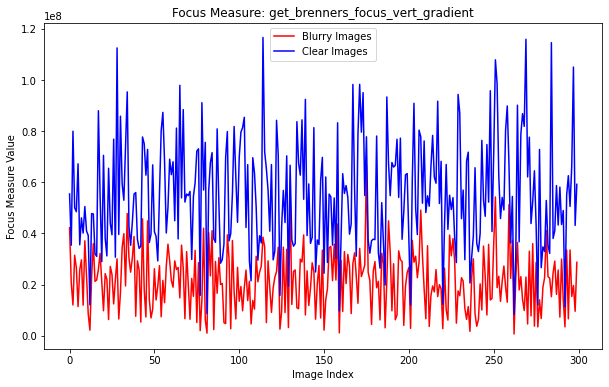

Focus Measure: get_brenners_focus_color
   Blurry Images - Mean: 10792328.3
   Clear Images - Mean: 18960645.175555553
   Separation: 8168316.875555553



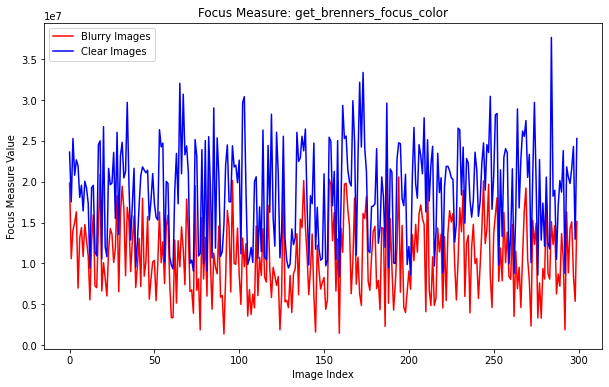

Best focus measure function is get_brenners_focus_horizontal_gradient with separation 37282320.23083334


In [19]:
# Define paths to the blurry and clear images folders
# Define paths to the blurry and clear images folders
blur_images_folder = f"{HOME}/datasets/GOPRO_Large_subset-1/train/blur_images"
clear_images_folder = f"{HOME}/datasets/GOPRO_Large_subset-1/train/sharp_images"

# List of your 5 focus measure functions (assuming you've implemented them)
focus_functions = [
    get_brenners_focus_horizontal_derivative,
    get_brenners_focus_vert_derivative,
    get_brenners_focus_horizontal_gradient,
    get_brenners_focus_vert_gradient,
    get_brenners_focus_color
]

# Run the comparison experiment
compare_focus_measures(blur_images_folder, clear_images_folder, focus_functions)

### Conclusion
Hopefully by now you've run all the cells and have been able to successfully recreate the experiment. By both visual inspection of the charts, and by comparing separation of focus measure mean's where
 ```separation = abs(clear_mean - blurry_mean)``` 
 its clear that the horizontal gradient is the most effective for this dataset when attempting to best for distinguishing between blurry and clear images. 

This is a incredibly valuable functionality, especially when deploying computer vision solutions where blur or vibration is present. 